In [37]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import glob

In [38]:
def upload_image(path):
    img_list = [cv2.imread(file) for file in glob.glob(os.path.join(path,'*.png'))]
    return np.array(img_list)

In [39]:
conformi = upload_image("./bianco_spesso_train/train/conformi")
difettose = upload_image("./bianco_spesso_train/train/difettose")

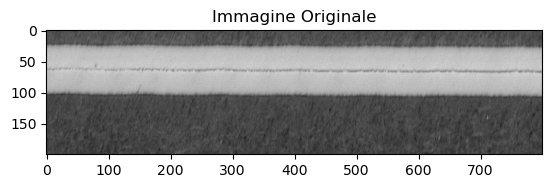

In [40]:
#plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(conformi[1], cv2.COLOR_BGR2RGB))
plt.title('Immagine Originale')
#plt.axis('off')
plt.show()

In [41]:
hog = cv2.HOGDescriptor()

hog_conformi = [hog.compute(image) for image in conformi]
hog_difettose = [hog.compute(image) for image in difettose]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [43]:
X = np.vstack((hog_conformi, hog_difettose))
y = np.array([0] * len(hog_conformi) + [1] * len(hog_difettose) )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)


In [44]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

MemoryError: bad allocation